In [1]:
import os 
import json
import numpy as np
import matplotlib.pyplot as plt
import functools
import nltk
!pip install xgboost
import xgboost as xgb
import re
import seaborn as sn

# Visualization
#!pip install plotly
#import plotly.express as px

#!pip install emoji
from emoji import UNICODE_EMOJI

# Sklearn
    
import sklearn
from sklearn.model_selection import train_test_split, cross_validate # for splitting data into train and test samples
from sklearn.svm import SVC, LinearSVC # for Support Vector Classification baseline model
from sklearn.naive_bayes import GaussianNB, ComplementNB, MultinomialNB
from sklearn.semi_supervised import SelfTrainingClassifier # for Semi-Supervised learning
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score # for model evaluation metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

contents = []
with open("rumour-annotation-2_annotations.json", 'rb') as j:
     contents.append(json.loads(j.read()))

contents2 = []
with open("rumour-annotation-3_annotations.json", 'rb') as j:
     contents2.append(json.loads(j.read()))

contents3 = []
with open("rumour-annotation_annotations.json", 'rb') as j:
     contents3.append(json.loads(j.read()))

contents4 = []
with open("rumour-annotation-4_annotations.json", 'rb') as j:
     contents4.append(json.loads(j.read()))


Text(0, 0.5, 'frequency')

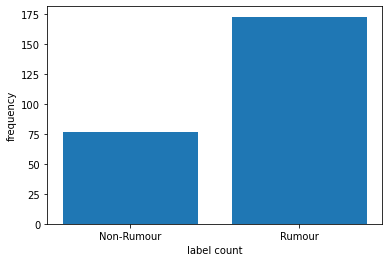

In [2]:
annotations = contents[0]["examples"]

classnames = []
for i in range(0,len(annotations)):
    classnames.append(annotations[i]["classifications"][0]["classname"])

unique, counts = np.unique(classnames, return_counts=True)
plt.bar(unique, counts)
plt.xlabel("label count")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

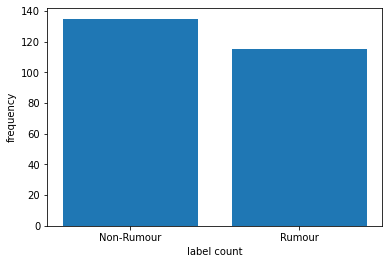

In [3]:
annotations2 = contents2[0]["examples"]

classnames2 = []
for i in range(0,len(annotations2)):
    classnames2.append(annotations2[i]["classifications"][0]["classname"])

unique, counts = np.unique(classnames2, return_counts=True)
plt.bar(unique, counts)
plt.xlabel("label count")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

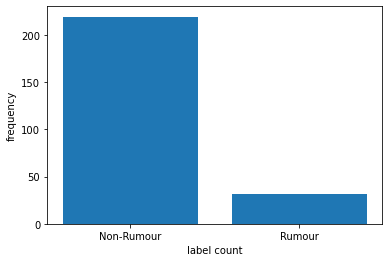

In [4]:
annotations3 = contents3[0]["examples"]

classnames3 = []
for i in range(0,len(annotations3)):
    classnames3.append(annotations3[i]["classifications"][0]["classname"])

unique, counts = np.unique(classnames3, return_counts=True)
plt.bar(unique, counts)
plt.xlabel("label count")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

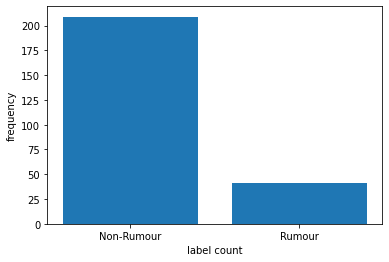

In [5]:
annotations4 = contents4[0]["examples"]

classnames4 = ["Rumour"]
for i in range(1,len(annotations4)):
    classnames4.append(annotations4[i]["classifications"][0]["classname"])

unique, counts = np.unique(classnames4, return_counts=True)
plt.bar(unique, counts)
plt.xlabel("label count")
plt.ylabel("frequency")

In [6]:
# Using readline()
file = open('#jinek.txt', 'r')
count = 0
tweets = []

while True:
    count += 1
 
    # Get next line from file
    line = file.readline()
 
    # if line is empty
    # end of file is reached
    if not line:
        break
    tweets.append(json.loads(line))#,encoding="utf-8"))
    
data1 = []
for i in range(len(tweets)):
    for j in range(len(tweets[i]["data"])):
        temp = []
        temp.append(tweets[i]["data"][j])
        user = [k for k in tweets[0]["includes"]["users"] 
                if k["id"] == tweets[i]["data"][j]["author_id"]]
        temp.append(user)
        temp.append("#jinek")
        temp.append(-1)
        temp.append("n.a.")
        data1.append(temp)
len(data1)

175780

In [7]:
# Using readline()
file1 = open('#vleestaks.txt', 'r')
count = 0
tweets = []

while True:
    count += 1
 
    # Get next line from file
    line = file1.readline()
 
    # if line is empty
    # end of file is reached
    if not line:
        break
    tweets.append(json.loads(line))#,encoding="utf-8"))
    
data2 = []
for i in range(len(tweets)):
    for j in range(len(tweets[i]["data"])):
        temp = []
        temp.append(tweets[i]["data"][j])
        user = [k for k in tweets[0]["includes"]["users"] 
                if k["id"] == tweets[i]["data"][j]["author_id"]]
        temp.append(user)
        temp.append("#vleestaks")
        temp.append(-1)
        temp.append("n.a.")
        data2.append(temp)
len(data2)

10542

In [8]:
# Using readline()
file = open('#inflatie.txt', 'r')
count = 0
tweets = []

while True:
    count += 1
 
    # Get next line from file
    line = file.readline()
 
    # if line is empty
    # end of file is reached
    if not line:
        break
    tweets.append(json.loads(line))#,encoding="utf-8"))
    
data3 = []
for i in range(len(tweets)):
    for j in range(len(tweets[i]["data"])):
        temp = []
        temp.append(tweets[i]["data"][j])
        user = [k for k in tweets[0]["includes"]["users"] 
                if k["id"] == tweets[i]["data"][j]["author_id"]]
        temp.append(user)
        temp.append("#inflatie")
        temp.append(-1)
        temp.append("n.a.")
        data3.append(temp)
len(data3)

39278

In [9]:
data = data1 + data2 + data3

In [10]:
sample1 = [annotations[i]["content"] for i in range(len(annotations))]
sample2 = [annotations2[i]["content"] for i in range(len(annotations2))]
sample3 = [annotations3[i]["content"] for i in range(len(annotations3))]
sample4 = [annotations4[i]["content"] for i in range(len(annotations4))]

sample = sample1 + sample2 + sample3 + sample4

annotations = annotations + annotations2 + annotations3 + annotations4

In [11]:
import time 
#text = data2[x][0]["text"]

def get_features(data):

    features = []

    for x in range(0,len(data)):
        temp = []
        if data[x][1] != []:
            followers_count = data[x][1][0]["public_metrics"]["followers_count"]
            temp.append(followers_count)
        else:
            temp.append(0)

        tweetcount = -1 
        if data[x][1] != []:        
            tweetcount = data[x][1][0]["public_metrics"]["tweet_count"]
            temp.append(tweetcount)
        else:
            temp.append(0)

        qmarks = "?" in data[x][0]["text"]
        temp.append(int(qmarks))

        if data[x][1] != []:
            verified = data[x][1][0]["verified"]
            temp.append(int(verified))    
        else:
            temp.append(0)

        accountlife = time.mktime(time.localtime()) - time.mktime(time.strptime(data[x][0]["created_at"], "%Y-%m-%dT%H:%M:%S.000Z"))
        temp.append(accountlife)

        if data[x][1] != []:    
            ratio = (data[x][1][0]["public_metrics"]["followers_count"]+1)/(data[x][1][0]["public_metrics"]["following_count"]+2)
            temp.append(ratio)
        else:
            temp.append(0)

        emark = "!" in data[x][0]["text"]
        temp.append(int(emark))

        capitalletters = sum(1 for c in data[x][0]["text"] if c.isupper())/sum(1 for c in data[x][0])
        temp.append(capitalletters)

        retweet_count = data[x][0]["public_metrics"]["retweet_count"]
        temp.append(retweet_count)

        hashtags = "#" in data[x][0]["text"]
        temp.append(int(hashtags))

        if data[x][1] != []:
            following = data[x][1][0]["public_metrics"]["following_count"]
            temp.append(following)
        else:
            temp.append(0)

        text_length = len(data[x][0]["text"])
        temp.append(text_length)

        if data[x][1] != []:    
            listed_count = data[x][1][0]["public_metrics"]["listed_count"]
            temp.append(listed_count)
        else:
            temp.append(0)

        emoticons = True in [s in UNICODE_EMOJI['en'] for s in data[x][0]["text"]]
        temp.append(int(emoticons))

        #reply_count = data[x][0]["public_metrics"]["reply_count"]
        #temp.append(reply_count)

        #quote_count = data[x][0]["public_metrics"]["quote_count"]
        #temp.append(quote_count)

        like_count = data[x][0]["public_metrics"]["like_count"]
        temp.append(like_count)

        if data[x][1] != []:
            timeafterposting = time.mktime(time.strptime(data[x][1][0]["created_at"],"%Y-%m-%dT%H:%M:%S.000Z")) - time.mktime(time.strptime(data[x][0]["created_at"],"%Y-%m-%dT%H:%M:%S.000Z"))
            temp.append(timeafterposting)
        else:
            temp.append(0)

        #pos_tags = nltk.pos_tag(nltk.word_tokenize(data[x][0]["text"]))
        #temp.append(pos_tags)

        activity = accountlife/tweetcount
        temp.append(activity)

        #if data[x][1] != []:
        #    has_url = "profile_image_url" in data[x][1][0]
        #    temp.append(int(has_url))
        #else:
        #    temp.append(None)

        #fpp = True in [i in data[x][0]["text"].lower() for i in ["me", "my", "i", "mine"]]
        #temp.append(int(fpp))

        #nsfw = data[x][0]["possibly_sensitive"] 
        #temp.append(int(nsfw))
        #temp.append(data[x][2])
        #temp.append(sentence_vectors[x])
        #temp.append(texts[x])

        temp.append(data[x][3])
        features.append(temp)
        

    return features
        

In [12]:
features = get_features(data)

In [13]:
features1 = get_features(data1)
features2 = get_features(data2)
features3 = get_features(data3)

In [16]:
# data = data1 + data2 + data3
datacopy = data.copy()

In [17]:
sample = sample1 + sample2 + sample3 + sample4

In [18]:
texts = [datacopy[i][0]["text"] for i in range(len(datacopy))]

In [19]:
from difflib import get_close_matches
sample = sample1 + sample2 + sample3 + sample4
sample = [re.sub(r"[^a-zA-Z]+", "", i) for i in sample]

annotators = ["A", "B", "C", "D"]
texts = [datacopy[i][0]["text"] for i in range(len(datacopy))]
texts = [re.sub(r"[^a-zA-Z]+", "", i) for i in texts]

numbers = []
for i in sample:
    if i in texts:
        numbers.append(texts.index(i))
    else:
        matches = []
        for j in range(len(texts)):
            if texts[j].__contains__(i):
                matches.append([i,j])
        closest_match = get_close_matches(i, [i[0] for i in matches])[0]
        index = matches[[i[0] for i in matches].index(closest_match)][1]
        numbers.append(index)

counter = 0
for s in sample:
    index = numbers[counter]
    counter += 1
#     for i in sample:
#         if i in texts:
#             index = texts.index(i)
#         else:
#             matches = []
#             for j in range(len(texts)):
#                 if texts[j].__contains__(i):
#                     matches.append([i,j])
#             closest_match = get_close_matches(i, [i[0] for i in matches])[0]
#             index = matches[[i[0] for i in matches].index(closest_match)][1]
    
    if annotations[sample.index(s)]["classifications"] != []:
        label = annotations[sample.index(s)]["classifications"][0]["classname"]

        if s in sample1:
            datacopy[index][4] = annotators[0]
        elif s in sample2:
            datacopy[index][4] = annotators[1]
        elif s in sample3:
            datacopy[index][4] = annotators[2]
        else:
            datacopy[index][4] = annotators[3]

        if label == "Rumour":
            datacopy[index][3] = 1
        elif label == "Non-Rumour":
            datacopy[index][3] = 0
        else:
            datacopy[index][3] = 1
    else:
        datacopy[index][3] = 1

#     for i in range(len(texts)):
#         if texts[i] in s:
#             if annotations[s.index(texts[i])]["classifications"] != []:
#                 label = annotations[s.index(texts[i])]["classifications"][0]["classname"]
#                 datacopy[i][4] = annotators[sample.index(s)]
#                 if label == "Rumour":
#                     datacopy[i][3] = 1
#                 elif label == "Non-Rumour":
#                     datacopy[i][3] = 0
#             else:
#                 datacopy[i][3] = 1

In [20]:
len([x for x in datacopy if x[3] == 1])

349

In [21]:
len([x for x in datacopy if x[3] == 0])

619

In [22]:
len([x for x in datacopy if x[3] == -1])

224632

In [23]:
print(len([x for x in datacopy if x[4] == "A"]))
print(len([x for x in datacopy if x[4] == "B"]))
print(len([x for x in datacopy if x[4] == "C"]))
print(len([x for x in datacopy if x[4] == "D"]))
print(len([x for x in datacopy if x[4] == "n.a."]))

0
0
0
967
224633


In [24]:
copyfeatures = get_features(datacopy)

In [72]:
import pandas as pd

columns = ["followers_count",
          "tweet_count",
          "question_marks",
          "verified",
          "accountlife",
          "followers_ratio",
          "exclamation_marks",
          "capital letters",
          "retweet_count",
          "hashtags",
          "following",
          "text length",
          "listed_count",
          "emoticons",
#          "reply_count",
#          "quote_count",
          "like_count",
          "time_after_posting",
#          "pos_tags",
          "activity",
#          "has_url",
#          "has_first_person_pronouns",
#          "possibly_sensitive",
#          "text",
          "label"]
dfcopy = pd.DataFrame(data=copyfeatures, index=None, columns=columns)
#df = df.drop("hashtag", axis=1)
#del columns[-2]

In [73]:
dfcopy

,followers_count,tweet_count,question_marks,verified,accountlife,followers_ratio,exclamation_marks,capital letters,retweet_count,hashtags,following,text length,listed_count,emoticons,like_count,time_after_posting,activity,label
0,12,2876,0,0,10057852.0,3.250000,0,0.583333,0,1,2,138,0,0,0,-42256836.0,3.497167e+03,-1
1,965,11545,0,0,10058391.0,3.864000,0,0.750000,1,1,248,134,18,0,0,-400289838.0,8.712335e+02,-1
2,41,9313,0,0,10059123.0,3.230769,0,4.583333,0,1,11,296,3,0,0,-166479246.0,1.080116e+03,-1
3,158,14946,0,0,10059138.0,9.937500,0,0.750000,1,1,14,140,30,0,0,-366653103.0,6.730321e+02,-1
4,158,14946,1,0,10059145.0,9.937500,0,1.333333,2,1,14,140,30,0,0,-366653096.0,6.730326e+02,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225595,0,0,1,0,397188315.0,0.000000,1,0.230769,0,1,0,124,0,0,0,0.0,-3.971883e+08,-1
225596,0,0,0,0,399451841.0,0.000000,1,0.545455,0,1,0,135,0,0,0,0.0,-3.994518e+08,-1
225597,0,0,0,0,402570417.0,0.000000,0,1.090909,0,1,0,136,0,0,0,0.0,-4.025704e+08,-1
225598,0,0,0,0,403522458.0,0.000000,1,0.363636,0,1,0,89,0,0,0,0.0,-4.035225e+08,-1


In [74]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
scaler.fit(dfcopy[["time_after_posting", "activity", "accountlife"]].to_numpy())
dfcopy[["time_after_posting", "activity", "accountlife"]] = scaler.transform(dfcopy[["time_after_posting", "activity", "accountlife"]].to_numpy())
dfcopy

# for i in columns[:-1]:
#     scaler = MinMaxScaler()
#     scaler.fit(dfcopy[[i]])
#     dfcopy[[i]] = pd.DataFrame(scaler.transform(dfcopy[[i]]))
# dfcopy

,followers_count,tweet_count,question_marks,verified,accountlife,followers_ratio,exclamation_marks,capital letters,retweet_count,hashtags,following,text length,listed_count,emoticons,like_count,time_after_posting,activity,label
0,12,2876,0,0,0.002835,3.250000,0,0.583333,0,1,2,138,0,0,0,0.910891,0.993759,-1
1,965,11545,0,0,0.002836,3.864000,0,0.750000,1,1,248,134,18,0,0,0.155891,0.993752,-1
2,41,9313,0,0,0.002838,3.230769,0,4.583333,0,1,11,296,3,0,0,0.648938,0.993753,-1
3,158,14946,0,0,0.002838,9.937500,0,0.750000,1,1,14,140,30,0,0,0.226822,0.993752,-1
4,158,14946,1,0,0.002838,9.937500,0,1.333333,2,1,14,140,30,0,0,0.226822,0.993752,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225595,0,0,1,0,0.979486,0.000000,1,0.230769,0,1,0,124,0,0,0,1.000000,0.019936,-1
225596,0,0,0,0,0.985197,0.000000,1,0.545455,0,1,0,135,0,0,0,1.000000,0.014387,-1
225597,0,0,0,0,0.993064,0.000000,0,1.090909,0,1,0,136,0,0,0,1.000000,0.006741,-1
225598,0,0,0,0,0.995466,0.000000,1,0.363636,0,1,0,89,0,0,0,1.000000,0.004406,-1


              precision    recall  f1-score   support

           0       0.38      0.02      0.04       128
           1       0.33      0.92      0.48        66

    accuracy                           0.33       194
   macro avg       0.35      0.47      0.26       194
weighted avg       0.36      0.33      0.19       194



/tmp/ipykernel_72323/3152313851.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_unlabeled)


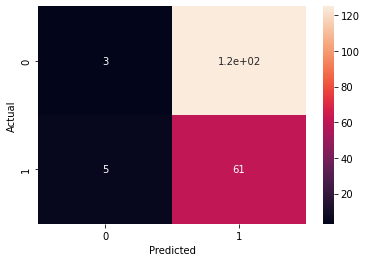

4.7383996212121215e-01


In [75]:
df_labeled=dfcopy[dfcopy["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)

df_unlabeled = dfcopy[dfcopy["label"]==-1]
df_train = df_train.append(df_unlabeled)

X_baseline=df_train[columns[:-1]].to_numpy()
y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[columns[:-1]].to_numpy()
y_test=df_test['label'].values

########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
model = MultinomialNB()
#model = xgb.XGBClassifier(objective="binary:logistic")
# model = model = SVC(kernel='linear', #'rbf' for 'normal' SVC
#                         probability=True, # Need to enable to be able to use predict_proba
#                         C=1.0, # default = 1.0
#                         max_iter = 100000,
#                         gamma='scale', # default = 'scale',
#                    )

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=1000, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=False # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
#clf_ST = self_training_model.fit(X_train, y_train)
# Fit the XGBoost model
clf_ST = self_training_model.fit(X_baseline, y_baseline)
#AUC


# accuracy, precision, recall, F1-score
print(classification_report(y_test, clf_ST.predict(X_test)))
#confusion matrix
cm = confusion_matrix(y_test, clf_ST.predict(X_test))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#print(roc_auc_score(y_baseline, clf_ST.predict(X_baseline.values)))
print(roc_auc_score(y_test, clf_ST.predict(X_test)))

In [ ]:
import seaborn as sn

cm = confusion_matrix(y_test, clf_ST.predict(X_test.values))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
#copy2features = get_features(datacopy2)

In [30]:
#dfcopy = pd.DataFrame(data=copy2features, index=None, columns=columns)

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       127
           1       0.35      1.00      0.52        67

    accuracy                           0.35       194
   macro avg       0.67      0.50      0.27       194
weighted avg       0.77      0.35      0.19       194



/tmp/ipykernel_72323/3917881298.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_unlabeled)
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(


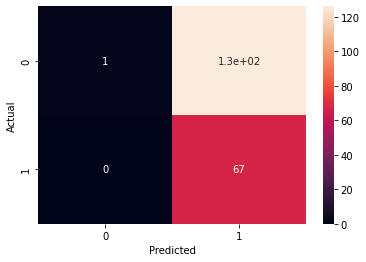

0.5039370078740157


/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(


In [76]:
df_labeled=dfcopy[dfcopy["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)

df_unlabeled = dfcopy[dfcopy["label"]==-1]
df_train = df_train.append(df_unlabeled)

X_baseline=df_train[columns[:-1]]
y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[columns[:-1]]
y_test=df_test['label'].values

########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
model = MultinomialNB()
#model = xgb.XGBClassifier(objective="binary:logistic")
# model = model = SVC(kernel='linear', #'rbf' for 'normal' SVC
#                         probability=True, # Need to enable to be able to use predict_proba
#                         C=1.0, # default = 1.0
#                         max_iter = 1000,
#                         gamma='scale', # default = 'scale',
#                    )

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=None, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=False # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
#clf_ST = self_training_model.fit(X_train, y_train)
# Fit the XGBoost model
clf_ST = self_training_model.fit(X_baseline, y_baseline)



#accuracy, precision, recall, F1-score
print(classification_report(y_test, clf_ST.predict(X_test.values)))
#confusion matrix
cm = confusion_matrix(y_test, clf_ST.predict(X_test.values))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#AUC
print(roc_auc_score(y_test, clf_ST.predict(X_test.values)))

In [77]:
#"normal" model without unlabeled data

df_labeled=dfcopy[dfcopy["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)

X_baseline=df_train[columns[:-1]]
y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[columns[:-1]]
y_test=df_test['label'].values


########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
model = MultinomialNB()
#model = xgb.XGBClassifier(objective="binary:logistic")
# model = model = SVC(kernel='linear', #'rbf' for 'normal' SVC
#                         probability=True, # Need to enable to be able to use predict_proba
#                         C=1.0, # default = 1.0
#                         max_iter = 1000,
#                         gamma='scale', # default = 'scale',
#                    )
model.fit(X_baseline, y_baseline)

print(classification_report(y_test, model.predict(X_test)))

print(roc_auc_score(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.60      0.02      0.05       125
           1       0.35      0.97      0.52        69

    accuracy                           0.36       194
   macro avg       0.48      0.50      0.28       194
weighted avg       0.51      0.36      0.21       194

0.4975072463768116


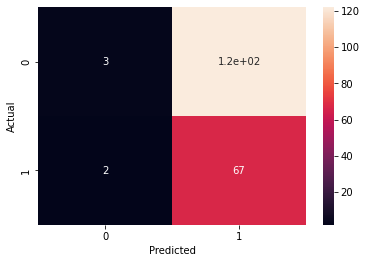

In [78]:
import seaborn as sn

#confusion matrix
cm = confusion_matrix(y_test, model.predict(X_test))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [79]:

#for i in range(0,10):
#self training, only two most important features

df_labeled=dfcopy[dfcopy["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)

df_unlabeled = dfcopy[dfcopy["label"]==-1]
df_train = df_train.append(df_unlabeled)

X_baseline=df_train[["exclamation_marks", "retweet_count"]]
y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[["exclamation_marks", "retweet_count"]]
y_test=df_test['label'].values

########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
model = MultinomialNB()
# model = xgb.XGBClassifier(objective="binary:logistic")
# model = model = SVC(kernel='linear', #'rbf' for 'normal' SVC
#                         probability=True, # Need to enable to be able to use predict_proba
#                         C=1.0, # default = 1.0
#                         max_iter = 1000,
#                         gamma='scale', # default = 'scale',
#                    )

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=None, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=False # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
#clf_ST = self_training_model.fit(X_train, y_train)
# Fit the XGBoost model
clf_ST = self_training_model.fit(X_baseline, y_baseline)



#accuracy, precision, recall, F1-score
print(classification_report(y_test, clf_ST.predict(X_test.values)))
#AUC
print(roc_auc_score(y_test, clf_ST.predict(X_test.values)))


              precision    recall  f1-score   support

           0       0.52      0.09      0.15       126
           1       0.34      0.85      0.48        68

    accuracy                           0.36       194
   macro avg       0.43      0.47      0.32       194
weighted avg       0.46      0.36      0.27       194

4.7012138188608776e-01


/tmp/ipykernel_72323/2726908722.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_unlabeled)
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(


/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(


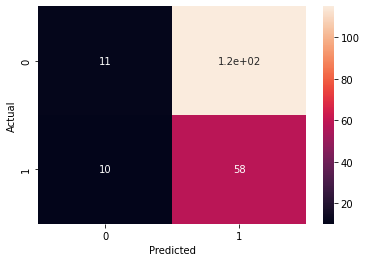

In [80]:
#confusion matrix
cm = confusion_matrix(y_test, clf_ST.predict(X_test.values))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [82]:
#only features that would have been known early on 

earlycolumns = [#"followers",
          "tweet_count",
          "question_marks",
          "verified",
          "accountlife",
#          "followers_count",
          "exclamation_marks",
          "capital letters",
#          "retweet_count",
          "hashtags",
          "following",
          "text length",
#          "listed_count",
          "emoticons",
#          "like_count",
          "time_after_posting",
          "activity",
          "label"]

In [83]:
import xgboost as xgb

#for i in range(0,5):
#         df_train, df_test = train_test_split(df, test_size=0.25)
#         #print('Size of train dataframe: ', df_train.shape[0])
#         #print('Size of test dataframe: ', df_test.shape[0])

#         pd.options.mode.chained_assignment = None 
#         #df_train.loc[:,"label"] = labels
#         df_train = df_train.sort_index()
#         # Show target value distribution
#         #print('Target Value Distribution:')
#         #print(df_train['label'].value_counts())
#         #print(df_test['label'].value_counts())

#         ########## Step 1 - Data Prep ########## 
#         # Select only records with known labels
#         df_train_labeled=df_train[df_train['label']!=-1]

#         # Select data for modeling 
#         X_baseline=df_train_labeled[columns[:-1]]
#         y_baseline=df_train_labeled['label'].values

#         # Put test data into an array
#         X_test=df_test[columns[:-1]]
#         y_test=df_test['label'].values
        
#         print(y_test)
df_labeled=dfcopy[dfcopy["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)

df_unlabeled = dfcopy[dfcopy["label"]==-1]
df_train = df_train.append(df_unlabeled)

X_baseline=df_train[earlycolumns[:-1]]
y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[earlycolumns[:-1]]
y_test=df_test['label'].values

########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
model = MultinomialNB()
#model = xgb.XGBClassifier(objective="binary:logistic")
# model = SVC(kernel='linear', #'rbf' for 'normal' SVC
#                         probability=True, # Need to enable to be able to use predict_proba
#                         C=1.0, # default = 1.0
#                         max_iter = 1000,
#                         gamma='scale', # default = 'scale',
#                    )

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=None, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=False # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
#clf_ST = self_training_model.fit(X_train, y_train)
# Fit the XGBoost model
clf_ST = self_training_model.fit(X_baseline, y_baseline)



#accuracy, precision, recall, F1-score
print(classification_report(y_test, clf_ST.predict(X_test.values)))
#AUC
print(roc_auc_score(y_test, clf_ST.predict(X_test.values)))

              precision    recall  f1-score   support

           0       0.64      0.12      0.21       129
           1       0.33      0.86      0.48        65

    accuracy                           0.37       194
   macro avg       0.49      0.49      0.34       194
weighted avg       0.54      0.37      0.30       194

4.927847346451998e-01


/tmp/ipykernel_72323/4281371998.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_unlabeled)
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(


/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(


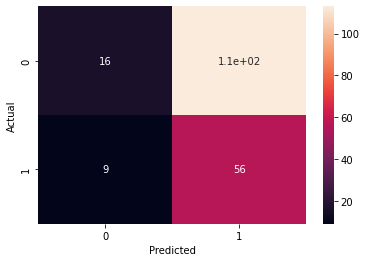

In [84]:
cm = confusion_matrix(y_test, clf_ST.predict(X_test.values))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [85]:
features1 = get_features(data1)
features2 = get_features(data2)
features3 = get_features(data3)

In [96]:
df1 = pd.DataFrame(data=features1, index=None, columns=columns) #jinek
df2 = pd.DataFrame(data=features2, index=None, columns=columns) #vleestaks
df3 = pd.DataFrame(data=features3, index=None, columns=columns) #inflatie

scaler = MinMaxScaler()
scaler.fit(df1[["time_after_posting", "activity", "accountlife"]].to_numpy())
df1[["time_after_posting", "activity", "accountlife"]] = scaler.transform(df1[["time_after_posting", "activity", "accountlife"]].to_numpy())

scaler = MinMaxScaler()
scaler.fit(df2[["time_after_posting", "activity", "accountlife"]].to_numpy())
df2[["time_after_posting", "activity", "accountlife"]] = scaler.transform(df2[["time_after_posting", "activity", "accountlife"]].to_numpy())


scaler = MinMaxScaler()
scaler.fit(df3[["time_after_posting", "activity", "accountlife"]].to_numpy())
df3[["time_after_posting", "activity", "accountlife"]] = scaler.transform(df3[["time_after_posting", "activity", "accountlife"]].to_numpy())

df3

,followers_count,tweet_count,question_marks,verified,accountlife,followers_ratio,exclamation_marks,capital letters,retweet_count,hashtags,following,text length,listed_count,emoticons,like_count,time_after_posting,activity,label
0,682,21212,0,0,0.000000e+00,1.144054,0,1.083333,18,0,595,140,0,0,0,0.937517,0.996328,-1
1,68,14545,0,0,2.023082e-08,0.327014,0,0.500000,15,1,209,140,0,0,0,0.985214,0.996329,-1
2,389,3563,0,0,7.586557e-08,0.586466,1,0.583333,311,1,663,140,1,0,0,0.636310,0.996334,1
3,425,29875,1,0,1.340292e-07,0.838583,1,1.916667,39,1,506,133,2,0,0,0.214278,0.996328,-1
4,464,6826,1,0,1.694331e-07,0.630936,1,1.916667,39,1,735,133,0,0,0,0.232281,0.996331,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39273,0,0,1,0,9.818376e-01,0.000000,1,0.230769,0,1,0,124,0,0,0,1.000000,0.017696,-1
39274,0,0,0,0,9.875617e-01,0.000000,1,0.545455,0,1,0,135,0,0,0,1.000000,0.012119,-1
39275,0,0,0,0,9.954481e-01,0.000000,0,1.090909,0,1,0,136,0,0,0,1.000000,0.004435,-1
39276,0,0,0,0,9.978557e-01,0.000000,1,0.363636,0,1,0,89,0,0,0,1.000000,0.002089,-1


              precision    recall  f1-score   support

           0       0.66      0.13      0.22       483
           1       0.36      0.88      0.51       267

    accuracy                           0.40       750
   macro avg       0.51      0.50      0.36       750
weighted avg       0.55      0.40      0.32       750

5.044548351827296e-01


/tmp/ipykernel_72323/2238727989.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = dfs[train_index[0]].append(dfs[train_index[1]], ignore_index=True)
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(


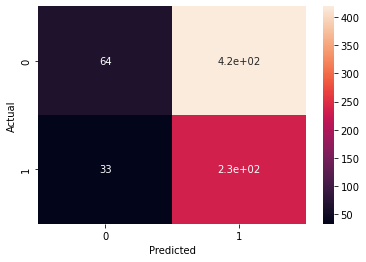

/tmp/ipykernel_72323/2238727989.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = dfs[train_index[0]].append(dfs[train_index[1]], ignore_index=True)


------
              precision    recall  f1-score   support

           0       1.00      0.09      0.16        23
           1       0.36      1.00      0.53        12

    accuracy                           0.40        35
   macro avg       0.68      0.54      0.35        35
weighted avg       0.78      0.40      0.29        35

5.434782608695652e-01


/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(


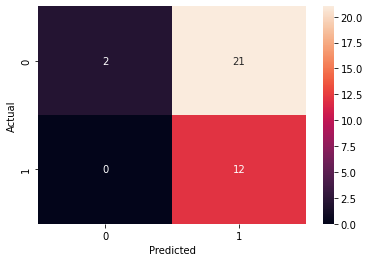

/tmp/ipykernel_72323/2238727989.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = dfs[train_index[0]].append(dfs[train_index[1]], ignore_index=True)
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(


------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       113
           1       0.38      0.99      0.55        70

    accuracy                           0.38       183
   macro avg       0.19      0.49      0.27       183
weighted avg       0.15      0.38      0.21       183

4.928571428571429e-01


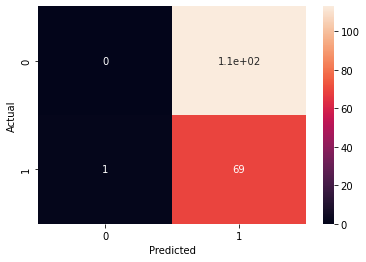

------


In [97]:
#normal classification except use cross validation to train on all hashtags - 1  each iteration  
#just classifies everything as unlabelled  


from sklearn.model_selection import KFold

kf = KFold(n_splits=3, shuffle=False)

dfs = [df1, df2, df3]

#model = xgb.XGBClassifier(objective="binary:logistic")



    
for train_index, test_index in kf.split(dfs):
    train = dfs[train_index[0]].append(dfs[train_index[1]], ignore_index=True)
    test = dfs[test_index[0]][dfs[test_index[0]]["label"] != -1]
    
    X_train = train[columns[:-1]]# + dfs[train_index[1]][columns[:-1]]
    X_test = test[columns[:-1]]
    y_train = train["label"]
    y_test = test ['label']
        
#    model = xgb.XGBClassifier(objective="binary:logistic")
#     model = SVC(kernel='linear', #'rbf' for 'normal' SVC
#                         probability=True, # Need to enable to be able to use predict_proba
#                         C=1.0, # default = 1.0
#                         max_iter = 1000,
#                         gamma='scale', # default = 'scale',
#                )
    model = MultinomialNB()
    
    # Specify Self-Training model parameters
    self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                                 threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                                 criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                                 #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                                 max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                                 verbose=False # default=False, Verbosity prints some information after each iteration
                                                )

    # Fit the model
    #clf_ST = self_training_model.fit(X_train, y_train)
    # Fit the XGBoost model
    clf_ST = self_training_model.fit(X_train, y_train)



    #accuracy, precision, recall, F1-score
    print(classification_report(y_test, clf_ST.predict(X_test.values)))
    print(roc_auc_score(y_test, clf_ST.predict(X_test.values)))
    cm = confusion_matrix(y_test, clf_ST.predict(X_test.values))
    sn.heatmap(cm, annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print("------")    

In [98]:
columns = ["followers_count",
          "tweet_count",
          "question_marks",
          "verified",
          "accountlife",
          "followers_ratio",
          "exclamation_marks",
          "capital letters",
          "retweet_count",
          "hashtags",
          "following",
          "text length",
          "listed_count",
          "emoticons",
#          "reply_count",
#          "quote_count",
          "like_count",
          "time_after_posting",
#          "pos_tags",
          "activity",
#          "has_url",
#          "has_first_person_pronouns",
#          "possibly_sensitive",
#          "text",
          "label"]


context_columns = ["followers_count",
          "tweet_count",
#           "question_marks",
          "verified",
          "accountlife",
          "followers_ratio",
#           "exclamation_marks",
#           "capital letters",
          "retweet_count",
#           "hashtags",
          "following",
#           "text length",
          "listed_count",
#           "emoticons",
          "like_count",
          "time_after_posting",
          "activity",
          "label"]

content_columns = [#"followers_count",
          #"tweet_count",
          "question_marks",
          #"verified",
          #"accountlife",
          #"followers_ratio",
          "exclamation_marks",
          "capital letters",
          #"retweet_count",
          "hashtags",
          #"following",
          "text length",
          #"listed_count",
          "emoticons",
          #"like_count",
          #"time_after_posting",
          #"activity",
          "label"]

In [99]:
dfcontext = pd.DataFrame(data=[[x[0], x[1], x[3], x[4], x[5], x[8], x[10], x[12], x[14], x[15], x[16], x[17]] for x in copyfeatures], index=None, columns=context_columns)
dfcontent = pd.DataFrame(data=[[x[2], x[6], x[7], x[9], x[11], x[13], x[17]] for x in copyfeatures], index=None, columns=content_columns)

In [101]:
scaler = MinMaxScaler()
scaler.fit(dfcontext[["time_after_posting", "activity", "accountlife"]].to_numpy())
dfcontext[["time_after_posting", "activity", "accountlife"]] = scaler.transform(dfcontext[["time_after_posting", "activity", "accountlife"]].to_numpy())

# scaler = MinMaxScaler()
# scaler.fit(dfcontent[["time_after_posting", "activity", "accountlife"]].to_numpy())
# dfcontent[["time_after_posting", "activity", "accountlife"]] = scaler.transform(dfcontent[["time_after_posting", "activity", "accountlife"]].to_numpy())


              precision    recall  f1-score   support

           0       0.56      0.11      0.18       131
           1       0.31      0.83      0.45        63

    accuracy                           0.34       194
   macro avg       0.43      0.47      0.31       194
weighted avg       0.48      0.34      0.27       194



/tmp/ipykernel_72323/3399344795.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_unlabeled)
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(


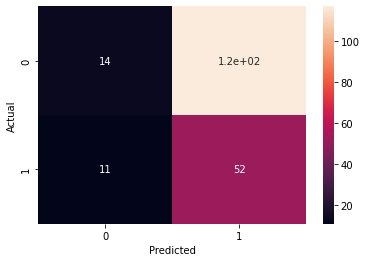

0.46613352720222945


/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(


In [105]:
df_labeled=dfcontext[dfcontext["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)

df_unlabeled = dfcontext[dfcontext["label"]==-1]
df_train = df_train.append(df_unlabeled)

X_baseline=df_train[context_columns[:-1]]
y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[context_columns[:-1]]
y_test=df_test['label'].values

########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
model = MultinomialNB()
#model = xgb.XGBClassifier(objective="binary:logistic")
# model = model = SVC(kernel='linear', #'rbf' for 'normal' SVC
#                         probability=True, # Need to enable to be able to use predict_proba
#                         C=1.0, # default = 1.0
#                         max_iter = 100000,
#                         gamma='scale', # default = 'scale',
#                    )

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=1000, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=False # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
#clf_ST = self_training_model.fit(X_train, y_train)
# Fit the XGBoost model
clf_ST = self_training_model.fit(X_baseline, y_baseline)



#accuracy, precision, recall, F1-score
print(classification_report(y_test, clf_ST.predict(X_test.values)))
#confusion matrix
cm = confusion_matrix(y_test, clf_ST.predict(X_test.values))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(roc_auc_score(y_test, clf_ST.predict(X_test.values)))

/tmp/ipykernel_72323/1617899475.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_unlabeled)
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

              precision    recall  f1-score   support

           0       0.66      1.00      0.80       129
           1       0.00      0.00      0.00        65

    accuracy                           0.66       194
   macro avg       0.33      0.50      0.40       194
weighted avg       0.44      0.66      0.53       194



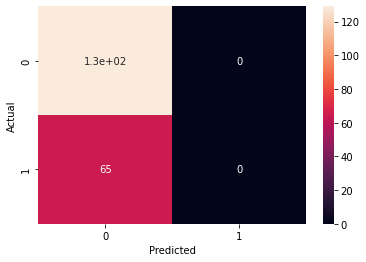

5e-01


/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(


In [104]:
df_labeled=dfcontent[dfcontent["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)

df_unlabeled = dfcontent[dfcontent["label"]==-1]
df_train = df_train.append(df_unlabeled)

X_baseline=df_train[content_columns[:-1]]
y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[content_columns[:-1]]
y_test=df_test['label'].values

########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
model = MultinomialNB()
# model = xgb.XGBClassifier(objective="binary:logistic")
# model = model = SVC(kernel='linear', #'rbf' for 'normal' SVC
#                         probability=True, # Need to enable to be able to use predict_proba
#                         C=1.0, # default = 1.0
#                         max_iter = 1000,
#                         gamma='scale', # default = 'scale',
#                    )

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=1000, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=False # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
#clf_ST = self_training_model.fit(X_train, y_train)
# Fit the XGBoost model
clf_ST = self_training_model.fit(X_baseline, y_baseline)



#accuracy, precision, recall, F1-score
print(classification_report(y_test, clf_ST.predict(X_test.values)))
#confusion matrix
cm = confusion_matrix(y_test, clf_ST.predict(X_test.values))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(roc_auc_score(y_test, clf_ST.predict(X_test.values)))

In [106]:
def get_features2(data):

    features = []

    for x in range(0,len(data)):
        temp = []
        if data[x][1] != []:
            followers_count = data[x][1][0]["public_metrics"]["followers_count"]
            temp.append(followers_count)
        else:
            temp.append(0)

        tweetcount = -1 
        if data[x][1] != []:        
            tweetcount = data[x][1][0]["public_metrics"]["tweet_count"]
            temp.append(tweetcount)
        else:
            temp.append(0)

        qmarks = "?" in data[x][0]["text"]
        temp.append(int(qmarks))

        if data[x][1] != []:
            verified = data[x][1][0]["verified"]
            temp.append(int(verified))    
        else:
            temp.append(0)

        accountlife = time.mktime(time.localtime()) - time.mktime(time.strptime(data[x][0]["created_at"], "%Y-%m-%dT%H:%M:%S.000Z"))
        temp.append(accountlife)

        if data[x][1] != []:    
            ratio = (data[x][1][0]["public_metrics"]["followers_count"]+1)/(data[x][1][0]["public_metrics"]["following_count"]+2)
            temp.append(ratio)
        else:
            temp.append(0)

        emark = "!" in data[x][0]["text"]
        temp.append(int(emark))

        capitalletters = sum(1 for c in data[x][0]["text"] if c.isupper())/sum(1 for c in data[x][0])
        temp.append(capitalletters)

        retweet_count = data[x][0]["public_metrics"]["retweet_count"]
        temp.append(retweet_count)

        hashtags = "#" in data[x][0]["text"]
        temp.append(int(hashtags))

        if data[x][1] != []:
            following = data[x][1][0]["public_metrics"]["following_count"]
            temp.append(following)
        else:
            temp.append(0)

        text_length = len(data[x][0]["text"])
        temp.append(text_length)

        if data[x][1] != []:    
            listed_count = data[x][1][0]["public_metrics"]["listed_count"]
            temp.append(listed_count)
        else:
            temp.append(0)

        emoticons = True in [s in UNICODE_EMOJI['en'] for s in data[x][0]["text"]]
        temp.append(int(emoticons))

        #reply_count = data[x][0]["public_metrics"]["reply_count"]
        #temp.append(reply_count)

        #quote_count = data[x][0]["public_metrics"]["quote_count"]
        #temp.append(quote_count)

        like_count = data[x][0]["public_metrics"]["like_count"]
        temp.append(like_count)

        if data[x][1] != []:
            timeafterposting = time.mktime(time.strptime(data[x][1][0]["created_at"],"%Y-%m-%dT%H:%M:%S.000Z")) - time.mktime(time.strptime(data[x][0]["created_at"],"%Y-%m-%dT%H:%M:%S.000Z"))
            temp.append(timeafterposting)
        else:
            temp.append(0)

        #pos_tags = nltk.pos_tag(nltk.word_tokenize(data[x][0]["text"]))
        #temp.append(pos_tags)

        activity = accountlife/tweetcount
        temp.append(activity)

        #if data[x][1] != []:
        #    has_url = "profile_image_url" in data[x][1][0]
        #    temp.append(int(has_url))
        #else:
        #    temp.append(None)

        #fpp = True in [i in data[x][0]["text"].lower() for i in ["me", "my", "i", "mine"]]
        #temp.append(int(fpp))

        #nsfw = data[x][0]["possibly_sensitive"] 
        #temp.append(int(nsfw))
        #temp.append(data[x][2])
        #temp.append(sentence_vectors[x])
        #temp.append(texts[x])

        
        temp.append(data[x][0]["text"])
        
        temp.append(data[x][3])
        features.append(temp)
        
        

    return features
        

In [107]:
featurestest = get_features2(data)

In [108]:
columns2 = ["followers_count",
          "tweet_count",
          "question_marks",
          "verified",
          "accountlife",
          "followers_ratio",
          "exclamation_marks",
          "capital letters",
          "retweet_count",
          "hashtags",
          "following",
          "text length",
          "listed_count",
          "emoticons",
#          "reply_count",
#          "quote_count",
          "like_count",
          "time_after_posting",
#          "pos_tags",
          "activity",
#          "has_url",
#          "has_first_person_pronouns",
#          "possibly_sensitive",
          "text",
          "label"]

In [109]:
df2 = pd.DataFrame(data=featurestest, index=None, columns=columns2)

In [110]:
df2

,followers_count,tweet_count,question_marks,verified,accountlife,followers_ratio,exclamation_marks,capital letters,retweet_count,hashtags,following,text length,listed_count,emoticons,like_count,time_after_posting,activity,text,label
0,12,2876,0,0,10058873.0,3.250000,0,0.583333,0,1,2,138,0,0,0,-42256836.0,3.497522e+03,#nosjournaal #buitenhof #eenvandaag #op1 @deni...,-1
1,965,11545,0,0,10059412.0,3.864000,0,0.750000,1,1,248,134,18,0,0,-400289838.0,8.713220e+02,RT @Quadenmakelaars: https://t.co/KO6Aw33rtg\n...,-1
2,41,9313,0,0,10060144.0,3.230769,0,4.583333,0,1,11,296,3,0,0,-166479246.0,1.080226e+03,#buitenhof\n\nGaaaaaaaaf land NL\n\n#rutte @Mi...,-1
3,158,14946,0,0,10060159.0,9.937500,0,0.750000,1,1,14,140,30,0,0,-366653103.0,6.731004e+02,RT @KeesVanLunsen_: Het laatste waar #Oekraïne...,-1
4,158,14946,1,0,10060166.0,9.937500,0,1.333333,2,1,14,140,30,0,0,-366653096.0,6.731009e+02,RT @CONCIES_Heiloo: Een #wet om #fastfood aan ...,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225595,0,0,1,0,397189337.0,0.000000,1,0.230769,0,1,0,124,0,0,0,0.0,-3.971893e+08,@JeanneDoo Vind je het niet beetje vreemd dat ...,-1
225596,0,0,0,0,399452863.0,0.000000,1,0.545455,0,1,0,135,0,0,0,0.0,-3.994529e+08,Het Pantelis Rapport van 16 november staat onl...,-1
225597,0,0,0,0,402571439.0,0.000000,0,1.090909,0,1,0,136,0,0,0,0.0,-4.025714e+08,Slim Beleggen - Weekend TV http://bit.ly/deDzP...,-1
225598,0,0,0,0,403523480.0,0.000000,1,0.363636,0,1,0,89,0,0,0,0.0,-4.035235e+08,Goud worstelt zich terug boven 1000 dollar! ht...,-1


In [111]:
df_labeled=df2[df2["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.25)

df_unlabeled = df2[df2["label"]==-1]
df_train = df_train.append(df_unlabeled)

df_test = df_test.reset_index()
df_train = df_train.reset_index()

# df_unlabeled = df2[df2["label"]==-1]
# df_train = df_train.append(df_unlabeled)

# X_baseline=df_train[content_columns[:-1]]
# y_baseline=df_train['label'].values

# # Put test data into an array
# X_test=df_test[content_columns[:-1]]
# y_test=df_test['label'].values

/tmp/ipykernel_72323/2493104691.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_unlabeled)


In [112]:
#https://towardsdatascience.com/how-to-turn-text-into-features-478b57632e99

class BoW:
    def __init__(self):
        # Here is where we keep all words. A set for faster lookup
        self.all_words = set()
        # Two dictionaries to map word to index and back. This helps 'encoding' and 'decoding' a BoW
        self.word_to_idx= {}
        self.idx_to_word= {}
        # The total number of words is just kept to aid starting the numpy array size, but can be inferred from all_words set.
        self.total_words = 0
        
    def fit(self, document):
        """
        Fits the BoW using the data. This is used to help the BoW learn the vocabulary and word indexes.
        """
        # Just checking if its empty or not
        if type(document) != list or len(document) <1 or type(document[0]) != str:
            raise TypeError("You must pass a list of strings for fitting.")
        list_of_sentences = document
        # Now, we go through each sentence.
        for sentence in list_of_sentences:
            # Naive tokenizing. Just splitting sentence is usually not enought, but we keep it simple here.
            words = [word.lower() for word in sentence.split()]
            for word in words:
                # Add all words. Since its a set, there won't be duplicates.
                self.all_words.add(word)
        for idx, word in enumerate(self.all_words):
            # Set the mapping indexes.
            self.word_to_idx[word] = idx
            self.idx_to_word[idx] = word
        # Set the vocab size.
        self.total_words = len(self.all_words)
        
    def transform(self, data):
        """
        Transforms the input data into the BoW model format.
        """
        # Check that the model is fit.
        if self.total_words == 0:
            raise AttributeError("You must first fit the data.")
        if type(data) == str:
            # We call the private helper function _transform_single for each input. If there's only a single sentence, we transform it here and return a single <vector>.
            transformed = self._transform_single(data.split())
        elif type(data) == list and type(data[0]) == str:
            # Now, if we have more than one sentence (a document), we'll make a matrix of stacked sentence arrays. For that we go through each sentence.
            # Create empty matrix.
            transformed = np.empty((len(data),self.total_words))
            # Iterate over all sentences - this can be parallelized.
            for row, sentence in enumerate(data):
                # Substitute each row by the sentence BoW.
                transformed[row] = self._transform_single(sentence.split())
        else:
            raise TypeError("You must pass either a string or list of strings for transformation.")
        return transformed

    def fit_transform(self, data):
        """
        Does both fitting and transforming at once.
        """
        self.fit(data)
        return self.transform(data)

    def _transform_single(self, list_of_words):
        """
        Auxiliary method for simplifying the process of transforming. Here is where the "magic" happens.
        """
        # Start a zero filled array with the size of the vocabulary.
        transformed = np.zeros(self.total_words)
        for word in list_of_words:
            # Iterate over sentence words checking if they are in the vocabulary.
            if word in self.all_words:
                word_idx = self.word_to_idx[word]
                # Change the value of that specific index, by increasing the value.
                transformed[word_idx]+=1
        return transformed          


In [113]:
thingie = [x for x in df_test["text"]]
# thingie = [re.sub(r"[^a-zA-Z0-9]", " ", thingie[x].lower()).split() for x in range(len(thingie))]

# bow = BoW()
# bow.fit(thingie)
# mat = bow.transform(thingie)

thingie2 = [x for x in df_train["text"]]
# thingie2 = [re.sub(r"[^a-zA-Z0-9]", " ", thingie2[x].lower()).split() for x in range(len(thingie2))]

# bow2 = BoW()
# bow2.fit(thingie2)
# mat2 = bow2.transform(thingie2)

In [114]:
from sklearn.feature_extraction.text import CountVectorizer 

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=450, stop_words='english')
bow3 = bow_vectorizer.fit_transform(thingie)

In [115]:
bow3df = pd.DataFrame(bow3.toarray())
bow3df["index"] = bow3df.index
bow3df

,0,1,2,3,4,5,6,7,8,9,...,441,442,443,444,445,446,447,448,449,index
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,237
238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,238
239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,239
240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,240


In [116]:
#df_test[columns2[:-1]]
df_test["index"] = df_test.index
df_test#[columns2[:-1]]

,index,followers_count,tweet_count,question_marks,verified,accountlife,followers_ratio,exclamation_marks,capital letters,retweet_count,hashtags,following,text length,listed_count,emoticons,like_count,time_after_posting,activity,text,label
0,0,0,0,0,0,24961623.0,0.000000,0,0.500000,1,1,0,140,0,0,0,0.0,-2.496162e+07,RT @woutschaap: En ze hebben groot gelijk.\nJe...,1
1,1,131,27051,0,0,41904474.0,0.218182,0,0.090909,0,1,603,34,3,0,0,-31350022.0,1.549091e+03,Kaag sloopt ze allebei hoor #jinek,1
2,2,0,0,0,0,42254199.0,0.000000,0,0.272727,0,1,0,201,0,0,1,0.0,-4.225420e+07,Je kan alleen een Roast doen als dat als zodan...,1
3,3,0,0,0,0,20033157.0,0.000000,0,0.916667,1,0,0,139,0,0,0,0.0,-2.003316e+07,RT @DeanPeirce: @Jinek_RTL\nDhr Illy is niet v...,0
4,4,0,0,0,0,22034609.0,0.000000,0,0.500000,0,1,0,111,0,0,4,0.0,-2.203461e+07,"Kijk #jinek (of #Op1npo / #op1 ), en laat u (m...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,237,0,0,0,0,121721434.0,0.000000,0,0.454545,1,1,0,119,0,0,0,0.0,-1.217214e+08,Huurverhoging #woningcorporaties houdt gelijke...,0
238,238,0,0,0,0,26707635.0,0.000000,0,0.000000,0,1,0,155,0,0,4,0.0,-2.670764e+07,erg charmant om een zeer geëmotioneerde gast d...,0
239,239,0,0,0,0,11497311.0,0.000000,0,0.750000,27,0,0,140,0,0,0,0.0,-1.149731e+07,RT @Jinek_RTL: ‘’Je hebt maar één kans om te z...,0
240,240,0,0,0,0,42302496.0,0.000000,0,0.333333,4,1,0,140,0,0,0,0.0,-4.230250e+07,RT @rickvanv: Nou was ik altijd wel fan van #J...,0


In [117]:
# df_test[columns2[:-2]].join(pd.DataFrame(bow3.toarray()))
bow3df = pd.merge(bow3df, df_test).drop(["index", "text", "label"], axis=1)
bow3df

,0,1,2,3,4,5,6,7,8,9,...,capital letters,retweet_count,hashtags,following,text length,listed_count,emoticons,like_count,time_after_posting,activity
0,0,0,0,0,0,0,0,0,0,0,...,0.500000,1,1,0,140,0,0,0,0.0,-2.496162e+07
1,0,0,0,0,0,0,0,0,0,0,...,0.090909,0,1,603,34,3,0,0,-31350022.0,1.549091e+03
2,0,0,0,0,0,0,0,0,0,0,...,0.272727,0,1,0,201,0,0,1,0.0,-4.225420e+07
3,0,0,0,0,0,0,0,0,0,0,...,0.916667,1,0,0,139,0,0,0,0.0,-2.003316e+07
4,0,0,0,0,0,0,0,0,0,0,...,0.500000,0,1,0,111,0,0,4,0.0,-2.203461e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0,0,0,0,0,0,0,0,0,0,...,0.454545,1,1,0,119,0,0,0,0.0,-1.217214e+08
238,0,0,0,0,0,0,0,0,0,0,...,0.000000,0,1,0,155,0,0,4,0.0,-2.670764e+07
239,0,0,0,0,0,0,0,0,0,0,...,0.750000,27,0,0,140,0,0,0,0.0,-1.149731e+07
240,0,0,0,0,0,0,0,0,0,0,...,0.333333,4,1,0,140,0,0,0,0.0,-4.230250e+07


In [118]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=450, stop_words='english')
bow4 = bow_vectorizer.fit_transform(thingie2)

In [119]:
bow4df = pd.DataFrame(bow4.toarray())
bow4df["index"] = bow4df.index
bow4df

,0,1,2,3,4,5,6,7,8,9,...,441,442,443,444,445,446,447,448,449,index
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,3
4,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225353,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,225353
225354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,225354
225355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,225355
225356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,225356


In [120]:
df_train["index"] = df_train.index
df_train#[columns2[:-1]]

,index,followers_count,tweet_count,question_marks,verified,accountlife,followers_ratio,exclamation_marks,capital letters,retweet_count,hashtags,following,text length,listed_count,emoticons,like_count,time_after_posting,activity,text,label
0,0,0,0,0,0,28534879.0,0.000000,0,0.153846,0,1,0,37,0,0,0,0.0,-2.853488e+07,@stranger1851 @MadelonVos__ #inflatie,0
1,1,0,0,0,0,21690434.0,0.000000,0,1.636364,3,1,0,237,0,0,5,0.0,-2.169043e+07,Die #Corona is toch wel een goeie afleiding va...,1
2,2,395,146924,0,0,21174052.0,1.643154,0,0.833333,0,1,239,78,46,1,0,-330904410.0,1.441157e+02,Mevrouw Floor Bremer... Dan ben ik al geweest ...,0
3,3,751,62147,0,0,20179847.0,0.423901,0,0.833333,0,1,1772,125,19,0,0,-391482385.0,3.247115e+02,#Jinek\nBurgemeester Aboutaleb\nGeen enkele re...,0
4,4,389,3563,0,0,8935132.0,0.586466,1,0.583333,311,1,663,140,1,0,0,-169356170.0,2.507755e+03,RT @EelcoHoecke: Laat u niks wijsmaken! De #in...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225353,225353,0,0,1,0,397189337.0,0.000000,1,0.230769,0,1,0,124,0,0,0,0.0,-3.971893e+08,@JeanneDoo Vind je het niet beetje vreemd dat ...,-1
225354,225354,0,0,0,0,399452863.0,0.000000,1,0.545455,0,1,0,135,0,0,0,0.0,-3.994529e+08,Het Pantelis Rapport van 16 november staat onl...,-1
225355,225355,0,0,0,0,402571439.0,0.000000,0,1.090909,0,1,0,136,0,0,0,0.0,-4.025714e+08,Slim Beleggen - Weekend TV http://bit.ly/deDzP...,-1
225356,225356,0,0,0,0,403523480.0,0.000000,1,0.363636,0,1,0,89,0,0,0,0.0,-4.035235e+08,Goud worstelt zich terug boven 1000 dollar! ht...,-1


In [121]:
bow4df = pd.merge(bow4df, df_train).drop(["index", "text", "label"], axis=1)
bow4df

,0,1,2,3,4,5,6,7,8,9,...,capital letters,retweet_count,hashtags,following,text length,listed_count,emoticons,like_count,time_after_posting,activity
0,0,0,0,0,0,0,0,0,0,0,...,0.153846,0,1,0,37,0,0,0,0.0,-2.853488e+07
1,0,0,0,0,0,1,0,0,0,0,...,1.636364,3,1,0,237,0,0,5,0.0,-2.169043e+07
2,0,0,0,0,0,0,0,0,0,0,...,0.833333,0,1,239,78,46,1,0,-330904410.0,1.441157e+02
3,0,0,0,0,0,0,0,0,1,0,...,0.833333,0,1,1772,125,19,0,0,-391482385.0,3.247115e+02
4,0,0,0,0,0,2,0,0,0,0,...,0.583333,311,1,663,140,1,0,0,-169356170.0,2.507755e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225353,0,0,0,0,0,0,0,0,0,0,...,0.230769,0,1,0,124,0,0,0,0.0,-3.971893e+08
225354,0,0,0,0,0,0,0,0,0,0,...,0.545455,0,1,0,135,0,0,0,0.0,-3.994529e+08
225355,0,0,0,0,0,0,0,0,0,0,...,1.090909,0,1,0,136,0,0,0,0.0,-4.025714e+08
225356,0,0,0,0,0,0,0,0,0,0,...,0.363636,0,1,0,89,0,0,0,0.0,-4.035235e+08


In [122]:
# for i in range(len(df_test["text"])):
#     df_test["text"][i] = mat[i]

In [123]:
# for i in range(len(df_train["text"])):
#     df_train["text"][i] = mat[i]

In [117]:
scaler = MinMaxScaler()
scaler.fit(bow3df[["time_after_posting", "activity", "accountlife"]].to_numpy())
bow3df[["time_after_posting", "activity", "accountlife"]] = scaler.transform(bow3df[["time_after_posting", "activity", "accountlife"]].to_numpy())

scaler = MinMaxScaler()
scaler.fit(bow4df[["time_after_posting", "activity", "accountlife"]].to_numpy())
bow4df[["time_after_posting", "activity", "accountlife"]] = scaler.transform(bow4df[["time_after_posting", "activity", "accountlife"]].to_numpy())

X_baseline=bow4df#df_train[columns2[:-1]]
y_baseline=df_train['label'].values

# Put test data into an array
X_test=dataframe=bow3df#df_test[columns2[:-1]]
y_test=df_test['label'].values

In [ ]:
########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
#model = MultinomialNB()
model = xgb.XGBClassifier(objective="binary:logistic")
# model = model = SVC(kernel='linear', #'rbf' for 'normal' SVC
#                      probability=True, # Need to enable to be able to use predict_proba
#                      C=1.0, # default = 1.0
#                      max_iter = 100000,
#                      gamma='scale', # default = 'scale',
#                 )

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=1000, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=False # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
#clf_ST = self_training_model.fit(X_train, y_train)
# Fit the XGBoost model
clf_ST = self_training_model.fit(X_baseline, y_baseline)



#accuracy, precision, recall, F1-score
print(classification_report(y_test, clf_ST.predict(X_test)))
#confusion matrix
cm = confusion_matrix(y_test, clf_ST.predict(X_test))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(roc_auc_score(y_test, clf_ST.predict(X_test)))

C:\Users\nickv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


              precision    recall  f1-score   support

           0       0.66      0.13      0.21       483
           1       0.36      0.88      0.51       267

    accuracy                           0.40       750
   macro avg       0.51      0.51      0.36       750
weighted avg       0.55      0.40      0.32       750

5.050945634726779e-01


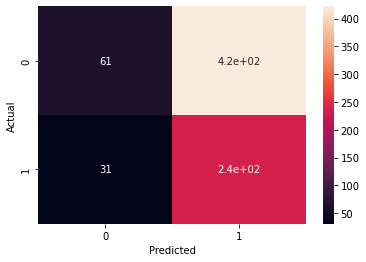

------
              precision    recall  f1-score   support

           0       1.00      0.13      0.23        23
           1       0.38      1.00      0.55        12

    accuracy                           0.43        35
   macro avg       0.69      0.57      0.39        35
weighted avg       0.79      0.43      0.34        35

5.652173913043479e-01


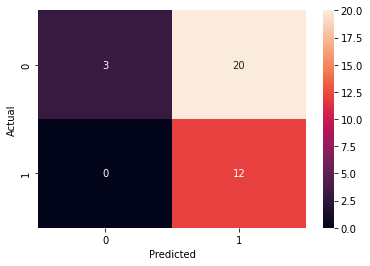

------
              precision    recall  f1-score   support

           0       0.29      0.02      0.03       113
           1       0.37      0.93      0.53        70

    accuracy                           0.37       183
   macro avg       0.33      0.47      0.28       183
weighted avg       0.32      0.37      0.22       183

4.731352718078382e-01


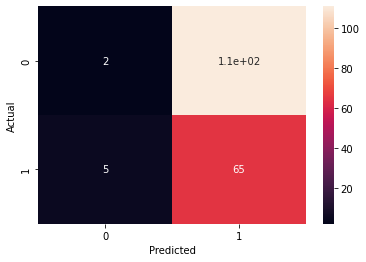

------


In [137]:
#normal classification except use cross validation to train on all hashtags - 1  each iteration  
#context features 

#dfcontext = pd.DataFrame(data=[[x[0], x[1], x[3], x[4], x[5], x[8], x[10], x[12], x[14], x[15], x[16], x[17]] for x in copyfeatures], index=None, columns=context_columns)
#dfcontent = pd.DataFrame(data=[[x[2], x[6], x[7], x[9], x[11], x[13], x[17]] for x in copyfeatures], index=None, columns=content_columns)
f1 = get_features(data1)
f2 = get_features(data2)
f3 = get_features(data3)
df1 = pd.DataFrame(data=[[x[0], x[1], x[3], x[4], x[5], x[8], x[10], x[12], x[14], x[15], x[16], x[17]] for x in f1], index=None, columns=context_columns) #jinek
#jinek 
df2 = pd.DataFrame(data=[[x[0], x[1], x[3], x[4], x[5], x[8], x[10], x[12], x[14], x[15], x[16], x[17]] for x in f2], index=None, columns=context_columns) #jinek
 #vleestaks
df3 = pd.DataFrame(data=[[x[0], x[1], x[3], x[4], x[5], x[8], x[10], x[12], x[14], x[15], x[16], x[17]] for x in f3], index=None, columns=context_columns) #jinek
 #inflatie
    
scaler = MinMaxScaler()
scaler.fit(df1[["time_after_posting", "activity", "accountlife"]].to_numpy())
df1[["time_after_posting", "activity", "accountlife"]] = scaler.transform(df1[["time_after_posting", "activity", "accountlife"]].to_numpy())

scaler = MinMaxScaler()
scaler.fit(df2[["time_after_posting", "activity", "accountlife"]].to_numpy())
df2[["time_after_posting", "activity", "accountlife"]] = scaler.transform(df2[["time_after_posting", "activity", "accountlife"]].to_numpy())


scaler = MinMaxScaler()
scaler.fit(df3[["time_after_posting", "activity", "accountlife"]].to_numpy())
df3[["time_after_posting", "activity", "accountlife"]] = scaler.transform(df3[["time_after_posting", "activity", "accountlife"]].to_numpy())

    
    
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, shuffle=False)

dfs = [df1, df2, df3]

#model = xgb.XGBClassifier(objective="binary:logistic")



    
for train_index, test_index in kf.split(dfs):
    train = pd.concat([dfs[train_index[0]],dfs[train_index[1]]], ignore_index=True)
    test = dfs[test_index[0]][dfs[test_index[0]]["label"] != -1]
    
    X_train = train[context_columns[:-1]].to_numpy()# + dfs[train_index[1]][columns[:-1]]
    X_test = test[context_columns[:-1]].to_numpy()
    y_train = train["label"]
    y_test = test ['label']
        
#     model = xgb.XGBClassifier(objective="binary:logistic")
#     model = SVC(kernel='linear', #'rbf' for 'normal' SVC
#                         probability=True, # Need to enable to be able to use predict_proba
#                         C=1.0, # default = 1.0
#                         max_iter = 1000,
#                         gamma='scale', # default = 'scale',
#                )
    model = MultinomialNB()
    
    # Specify Self-Training model parameters
    self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                                 threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                                 criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                                 #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                                 max_iter=1000, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                                 verbose=False # default=False, Verbosity prints some information after each iteration
                                                )
    #print(X_train)
#     print(train_index)
#     print(test_index)
#     print(np.unique(train["label"]))
    # Fit the model
    #clf_ST = self_training_model.fit(X_train, y_train)
    # Fit the XGBoost model
    clf_ST = self_training_model.fit(X_train, y_train)



    #accuracy, precision, recall, F1-score
    print(classification_report(y_test, clf_ST.predict(X_test)))
    print(roc_auc_score(y_test, clf_ST.predict(X_test)))
    cm = confusion_matrix(y_test, clf_ST.predict(X_test))
    sn.heatmap(cm, annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print("------")    

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       483
           1       0.00      0.00      0.00       267

    accuracy                           0.64       750
   macro avg       0.32      0.50      0.39       750
weighted avg       0.41      0.64      0.50       750

5e-01


/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


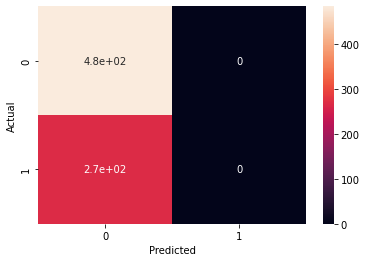

/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------
              precision    recall  f1-score   support

           0       0.66      1.00      0.79        23
           1       0.00      0.00      0.00        12

    accuracy                           0.66        35
   macro avg       0.33      0.50      0.40        35
weighted avg       0.43      0.66      0.52        35

5e-01


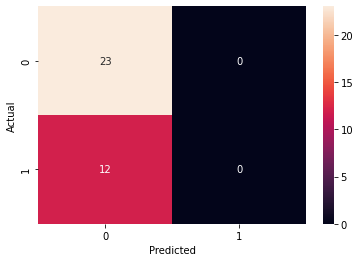

------


/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.62      1.00      0.76       113
           1       0.00      0.00      0.00        70

    accuracy                           0.62       183
   macro avg       0.31      0.50      0.38       183
weighted avg       0.38      0.62      0.47       183

5e-01


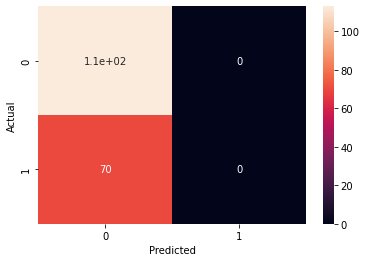

------


In [145]:
#normal classification except use cross validation to train on all hashtags - 1  each iteration  
#content features

#just classifies everything as unlabelled  

#dfcontext = pd.DataFrame(data=[[x[0], x[1], x[3], x[4], x[5], x[8], x[10], x[12], x[14], x[15], x[16], x[17]] for x in copyfeatures], index=None, columns=context_columns)
#dfcontent = pd.DataFrame(data=[[x[2], x[6], x[7], x[9], x[11], x[13], x[17]] for x in copyfeatures], index=None, columns=content_columns)
f1 = get_features(data1)
f2 = get_features(data2)
f3 = get_features(data3)
df1 = pd.DataFrame(data=[[x[2], x[6], x[7], x[9], x[11], x[13], x[17]] for x in f1], index=None, columns=content_columns)
#jinek
df2 = pd.DataFrame(data=[[x[2], x[6], x[7], x[9], x[11], x[13], x[17]] for x in f2], index=None, columns=content_columns) 
#vleestaks
df3 = pd.DataFrame(data=[[x[2], x[6], x[7], x[9], x[11], x[13], x[17]] for x in f3], index=None, columns=content_columns) 
#inflatie
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, shuffle=False)

dfs = [df1, df2, df3]

#model = xgb.XGBClassifier(objective="binary:logistic")



    
for train_index, test_index in kf.split(dfs):
    train = pd.concat([dfs[train_index[0]],dfs[train_index[1]]], ignore_index=True)
    test = dfs[test_index[0]][dfs[test_index[0]]["label"] != -1]
    
    X_train = train[content_columns[:-1]].to_numpy()# + dfs[train_index[1]][columns[:-1]]
    X_test = test[content_columns[:-1]].to_numpy()
    y_train = train["label"]
    y_test = test ['label']
        
#     model = xgb.XGBClassifier(objective="binary:logistic")
#     model = SVC(kernel='linear', #'rbf' for 'normal' SVC
#                         probability=True, # Need to enable to be able to use predict_proba
#                         C=1.0, # default = 1.0
#                         max_iter = 1000,
#                         gamma='scale', # default = 'scale',
#                )
    model = MultinomialNB()
    
    # Specify Self-Training model parameters
    self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                                 threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                                 criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                                 #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                                 max_iter=1000, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                                 verbose=False # default=False, Verbosity prints some information after each iteration
                                                )
    #print(X_train)
#     print(train_index)
#     print(test_index)
#     print(np.unique(train["label"]))
    # Fit the model
    #clf_ST = self_training_model.fit(X_train, y_train)
    # Fit the XGBoost model
    clf_ST = self_training_model.fit(X_train, y_train)



    #accuracy, precision, recall, F1-score
    print(classification_report(y_test, clf_ST.predict(X_test)))
    print(roc_auc_score(y_test, clf_ST.predict(X_test)))
    cm = confusion_matrix(y_test, clf_ST.predict(X_test))
    sn.heatmap(cm, annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print("------")    

In [142]:
df1

,question_marks,exclamation_marks,capital letters,hashtags,text length,emoticons,label
0,0,0,0.583333,1,138,0,-1
1,0,0,0.750000,1,134,0,-1
2,0,0,4.583333,1,296,0,-1
3,0,0,0.750000,1,140,0,-1
4,1,0,1.333333,1,140,0,-1
...,...,...,...,...,...,...,...
175775,1,0,0.230769,1,125,0,-1
175776,0,1,0.000000,1,19,0,-1
175777,0,0,0.666667,1,140,0,-1
175778,0,1,0.230769,1,147,0,-1
